#### LA 2 By
### Gowtham Karthikeyan S
### 21BBS0157

# --------------------------
Importing required modules

In [8]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
import graphviz

### Question 1

In [9]:
pd_df = pd.read_table('patient-data.csv', sep=None, engine='python')

gender_mapping = {"Female": 0, "Male": 1}
diet_mapping = {
    "Mediterranean": 0,
    "Western": 1,
    "Vegan": 2,
    "Vegetarian": 3,
    "Low-Carb": 4,
    "Balanced": 5,
    "Fast Food": 6,
    "Low-Fat": 7,
    "Processed Food": 8,
}

pd_df["Gender"] = pd_df["Gender"].map(gender_mapping)
pd_df["Current Diet"] = pd_df["Current Diet"].map(diet_mapping)
pd_df["Strict Diet Required"] = pd_df["Strict Diet Required"].map({"No": 0, "Yes": 1})

print(pd_df.head())

   RecordID  Gender  Age (Years)  Weight (kg)  Height (cm)   BMI  \
0         1       0           32           75          165  27.5   
1         2       1           45           54          180  16.7   
2         3       0           28           60          155  24.9   
3         4       1           22           78          175  25.5   
4         5       0           55           85          160  33.2   

   Current Diet  Strict Diet Required  
0             0                     0  
1             1                     1  
2             2                     0  
3             3                     0  
4             4                     1  


In [10]:
X = pd_df[["Gender","Age (Years)","Weight (kg)","Height (cm)","BMI","Current Diet"]]
y = pd_df["Strict Diet Required"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


new_patient = [[1, 20, 64, 185, 18.7, 3]]

prediction = nb_model.predict(new_patient)
if prediction[0] == 1:
  print("Strict diet is recommended for the new patient.")
else:
  print("Strict diet is not recommended for the new patient.")

Accuracy: 0.9
Strict diet is not recommended for the new patient.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Question 2

In [11]:
X_cluster = pd_df[["Age (Years)", "Weight (kg)", "Height (cm)", "BMI"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

pd_df["Cluster"] = kmeans.labels_

cluster_mapping = {
    0: "Normal",
    1: "Healthy",
    2: "Weak",
}
pd_df["Cluster_Category"] = pd_df["Cluster"].map(cluster_mapping)

print(pd_df.head())

new_patient_data = [[20, 64, 185, 18.7]]
new_patient_scaled = scaler.transform(new_patient_data)
new_patient_cluster = kmeans.predict(new_patient_scaled)[0]
new_patient_category = cluster_mapping[new_patient_cluster]
print(f"New patient classified as: {new_patient_category}")

   RecordID  Gender  Age (Years)  Weight (kg)  Height (cm)   BMI  \
0         1       0           32           75          165  27.5   
1         2       1           45           54          180  16.7   
2         3       0           28           60          155  24.9   
3         4       1           22           78          175  25.5   
4         5       0           55           85          160  33.2   

   Current Diet  Strict Diet Required  Cluster Cluster_Category  
0             0                     0        2             Weak  
1             1                     1        2             Weak  
2             2                     0        2             Weak  
3             3                     0        1          Healthy  
4             4                     1        0           Normal  
New patient classified as: Weak


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Question 3

In [12]:
road_df = pd.read_table('road-data.csv', sep=None, engine='python')

gender_mapping = {"Low": 0, "Moderate": 1, "High": 2}

road_df["Accident Risk"] = road_df["Accident Risk"].map(gender_mapping)

print(road_df.head())

  Road ID  Length (km)  Number of Bends  Traffic Volume (vehicles/hour)  \
0      R1           10                5                            2000   
1      R2           15                3                            1500   
2      R3            8                8                            2500   
3      R4           20                2                            1000   
4      R5           12                6                            2200   

   Accident Risk  
0              2  
1              1  
2              2  
3              0  
4              2  


Accuracy: 1.0


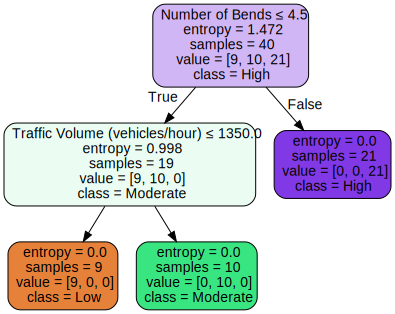

In [13]:
X = road_df[["Length (km)",  "Number of Bends",  "Traffic Volume (vehicles/hour)"]]
y = road_df['Accident Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X.columns,
                           class_names=['Low', 'Moderate', 'High'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph